Merged Dataset:
    ID     Name  Age  Salary   Department
0   1    Alice   25   50000           HR
1   2      Bob   30   60000  Engineering
2   3  Charlie   35   70000    Marketing

Missing values:
 ID            0
Name          0
Age           0
Salary        0
Department    0
dtype: int64

Duplicate rows: 0

Cleaned Data:
    ID     Name   Age  Salary   Department
0   1    Alice  25.0   50000           HR
1   2      Bob  30.0   60000  Engineering
2   3  Charlie  35.0   70000    Marketing


<ipython-input-2-d22878f377bb>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


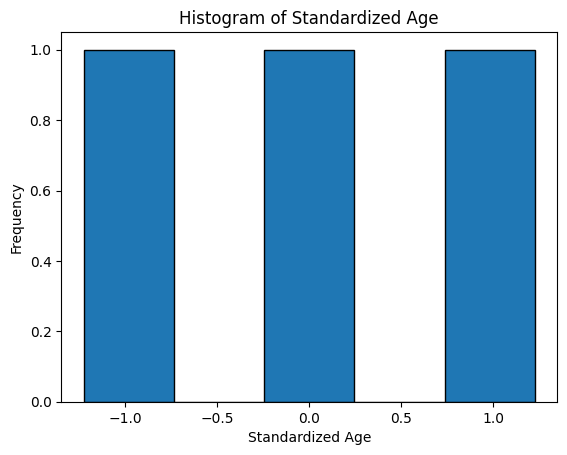


Final Data:
    ID     Name   Age  Salary   Department   JoinDate  JoinDay  JoinMonth  \
0   1    Alice  25.0   50000           HR 2020-01-15       15          1   
1   2      Bob  30.0   60000  Engineering 2019-06-20       20          6   
2   3  Charlie  35.0   70000    Marketing 2018-03-10       10          3   

   JoinYear  Salary_Normalized  Age_Normalized  Age_Standardized  \
0      2020                0.0             0.0         -1.224745   
1      2019                0.5             0.5          0.000000   
2      2018                1.0             1.0          1.224745   

  ExperienceLevel  
0          Junior  
1          Senior  
2          Senior  


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# ------------------------------
# 1. DATA COLLECTION
# ------------------------------

# Task 1: Collect data from two different sources and merge them
data1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
})

data2 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Salary': [50000, 60000, 70000],
    'Department': ['HR', 'Engineering', 'Marketing']
})

# Merge the two datasets
df = pd.merge(data1, data2, on='ID')
print("Merged Dataset:\n", df)

# Task 2: Validate the integrity of the collected datasets
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Task 3: Reflection
# (Add this as markdown or comment in notebook)
# Challenges: Merging data with mismatched schemas or missing keys. Solved by ensuring matching keys.

# ------------------------------
# 2. DATA CLEANING
# ------------------------------

# Introduce some issues
df.loc[1, 'Age'] = np.nan  # simulate missing value
df.loc[2, 'Name'] = 'charlie'  # lowercase name

# Task 1: Clean dataset
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Name'] = df['Name'].str.title()
print("\nCleaned Data:\n", df)

# Task 2: Cleaning checklist (write as markdown or comment)

# Task 3: Collaboration reflection
# Collaborated using version control and peer-reviewed the cleaning decisions

# ------------------------------
# 3. DATA TRANSFORMATION
# ------------------------------

# Task 1: Date column transformation
df['JoinDate'] = pd.to_datetime(['2020-01-15', '2019-06-20', '2018-03-10'])
df['JoinDay'] = df['JoinDate'].dt.day
df['JoinMonth'] = df['JoinDate'].dt.month
df['JoinYear'] = df['JoinDate'].dt.year

# Task 2: Apply normalization
scaler = MinMaxScaler()
df['Salary_Normalized'] = scaler.fit_transform(df[['Salary']])

# Task 3: Transformation importance comment
# Transformation improves interpretability, helps models perform better

# ------------------------------
# 4. FEATURE SCALING
# ------------------------------

# Task 1: Min-Max scaling on Age
df['Age_Normalized'] = scaler.fit_transform(df[['Age']])

# Task 2: Standardize Age and plot
standard_scaler = StandardScaler()
df['Age_Standardized'] = standard_scaler.fit_transform(df[['Age']])

plt.hist(df['Age_Standardized'], bins=5, edgecolor='black')
plt.title("Histogram of Standardized Age")
plt.xlabel("Standardized Age")
plt.ylabel("Frequency")
plt.show()

# Task 3: Scaling analysis
# Scaling is critical for models like SVM, KNN, which depend on distance

# ------------------------------
# 5. FEATURE ENGINEERING
# ------------------------------

# Task 1: Create synthetic feature
df['ExperienceLevel'] = df['Age'].apply(lambda x: 'Junior' if x < 30 else 'Senior')

# Task 2: Evaluate impact (comment)
# Evaluate model performance with and without the new feature

# Task 3: Research findings (add as markdown or comment)
# Feature engineering boosts model performance by creating informative attributes

# ------------------------------
# Final Data Preview
# ------------------------------
print("\nFinal Data:\n", df)